In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('pupils.csv')

In [4]:
df.head()

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6
1,agam,6,GR,172,71,92,9200,5,4
2,avi,7,ISR,143,58,82,12000,3,7
3,dani,7,US,160,70,90,15000,4,4
4,dina,7,ISR,110,26,64,10000,6,8


In [5]:
df.describe()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,9.433333,137.266667,51.500000,80.500000,20096.666667,4.366667,5.833333
std,2.207875,26.286136,18.104581,7.942683,11943.270601,1.629117,1.743626
min,6.000000,90.000000,26.000000,64.000000,7600.000000,2.000000,3.000000
25%,8.000000,113.500000,34.000000,74.000000,11175.000000,3.000000,4.250000
50%,9.000000,132.000000,53.000000,82.000000,17650.000000,4.500000,6.000000
75%,11.000000,158.000000,65.500000,85.750000,23750.000000,5.750000,7.000000
max,14.000000,192.000000,90.000000,94.000000,54100.000000,7.000000,10.000000


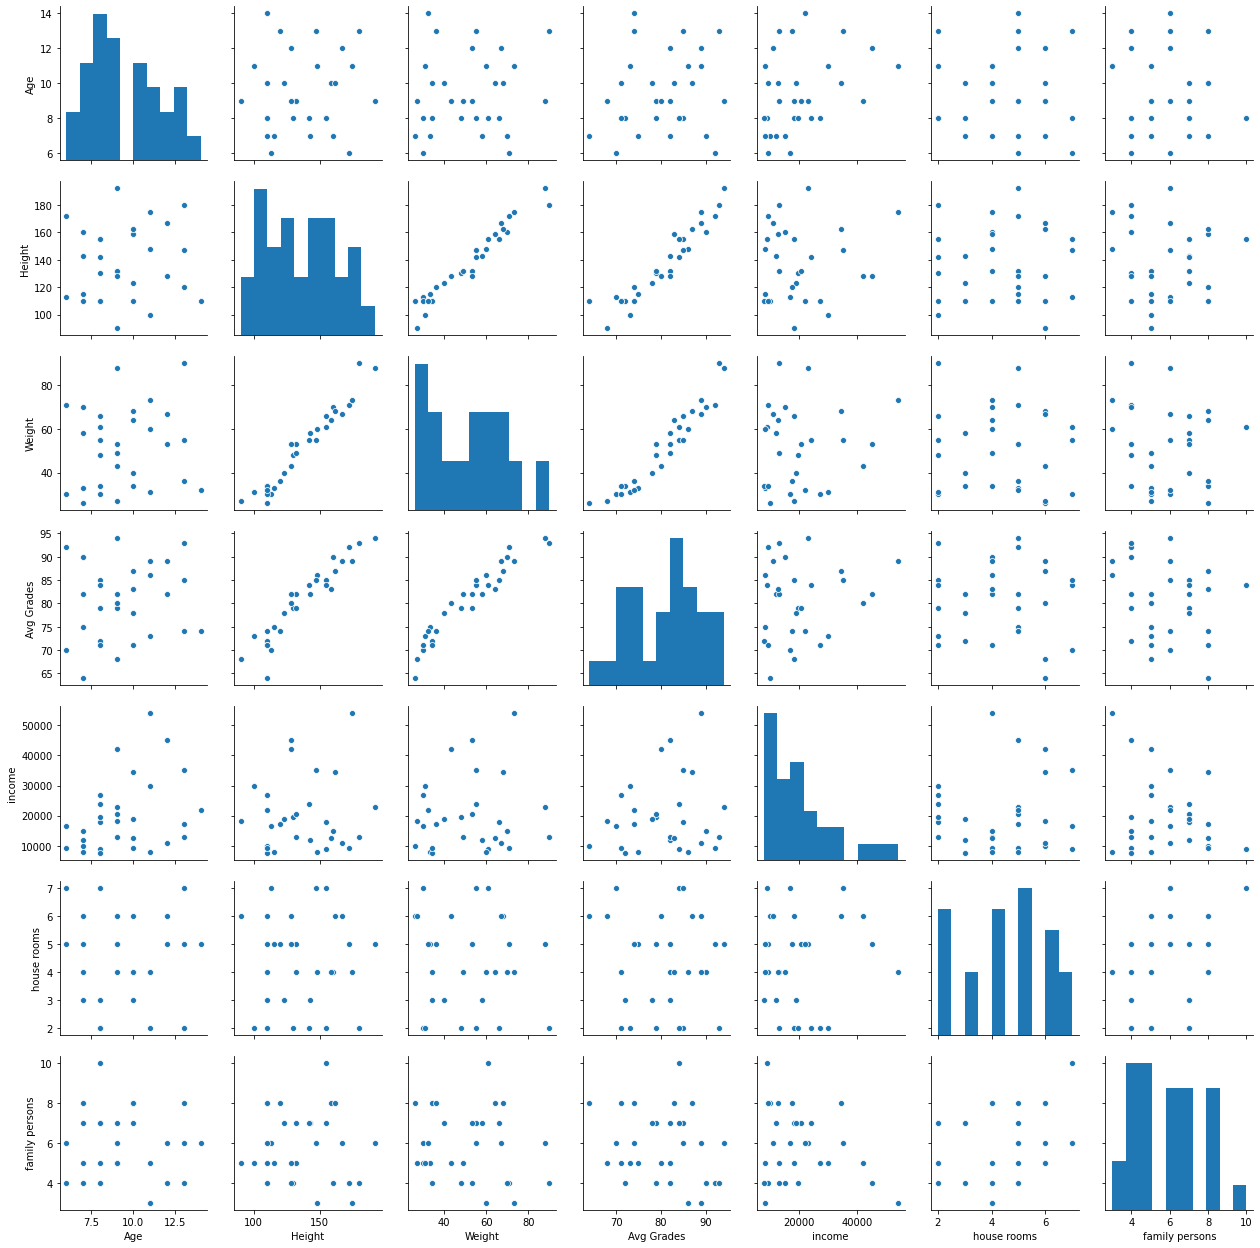

In [6]:
sns.pairplot(df)

In [7]:
import pandas as pd
import numpy as np


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Name              30 non-null object
Age               30 non-null int64
Country           30 non-null object
Height            30 non-null int64
Weight            30 non-null int64
Avg Grades        30 non-null int64
income            30 non-null int64
house rooms       30 non-null int64
family persons    30 non-null int64
dtypes: int64(7), object(2)
memory usage: 2.2+ KB


In [9]:
df.columns

Index(['Name', 'Age', 'Country', 'Height', 'Weight', 'Avg Grades', 'income',
       'house rooms', 'family persons'],
      dtype='object')

<AxesSubplot:xlabel='Avg Grades'>

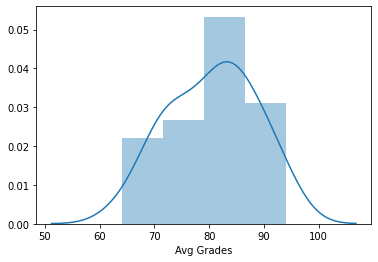

In [10]:
sns.distplot(df['Avg Grades'],kde=True)

In [11]:
# find out correlation between params
df.corr()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
Age,1.000000,0.074586,0.118616,0.150426,0.344763,0.040584,-0.052251
Height,0.074586,1.000000,0.974416,0.944887,0.079537,0.006496,-0.060690
Weight,0.118616,0.974416,1.000000,0.959074,0.091562,-0.084762,-0.125074
Avg Grades,0.150426,0.944887,0.959074,1.000000,0.145275,-0.065290,-0.212886
income,0.344763,0.079537,0.091562,0.145275,1.000000,0.062980,-0.241287
house rooms,0.040584,0.006496,-0.084762,-0.065290,0.062980,1.000000,0.289322
family persons,-0.052251,-0.060690,-0.125074,-0.212886,-0.241287,0.289322,1.000000


<AxesSubplot:>

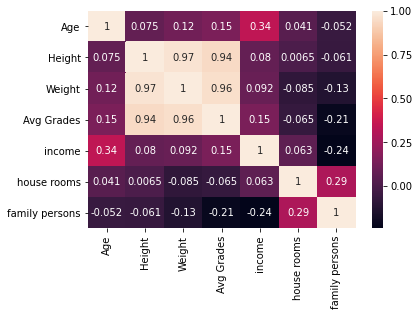

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.columns

Index(['Name', 'Age', 'Country', 'Height', 'Weight', 'Avg Grades', 'income',
       'house rooms', 'family persons'],
      dtype='object')

Now lets create a list of features as X axis and what we want to predict as y

In [14]:
X = df[['Height', 'Weight','income',
        'house rooms','family persons']]

In [15]:
y = df['Avg Grades']

We have a data and we want to build a model to predict targets 
We first need to test our model to see if it we give us the correct answers 
The solution is to split the data for example to 65% and 35% , run the model on 65% data, and then test on the 35% and see if the results are close to the real values. 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [19]:
import sklearn.linear_model as lin


In [20]:
model = lin.LinearRegression()


In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = model.predict(X_test)

In [23]:
model.score(X_train,y_train)

0.9251786570522549

In [24]:
model.score(X_test,y_test)

0.9118802282380092

In [25]:
##########################
# calculate mean absolute error
# mean square error
# sqrt of the latter
# use sklearn metrics if possible

In [26]:
from sklearn import metrics

In [27]:
metrics.mean_absolute_error(y_test, predictions)

2.099348412740139

In [28]:
#MSE
metrics.mean_squared_error(y_test, predictions)

6.675953908688426

In [29]:
#R (root) MSE = RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.5837867382368125

In [30]:
# 2->2, 4->16

In [31]:
########################################

In [32]:
model.intercept_

60.464848258358984

In [33]:
model.coef_

array([ 3.09255907e-02,  3.99085936e-01, -2.04521930e-05, -3.53243488e-02,
       -6.57045936e-01])

In [34]:
X_train.columns

Index(['Height', 'Weight', 'income', 'house rooms', 'family persons'], dtype='object')

In [35]:
pd.DataFrame(model.coef_.reshape(-1,1),X_train.columns,columns=["Coeff"])

,Coeff
Height,0.030926
Weight,0.399086
income,-0.000020
house rooms,-0.035324
family persons,-0.657046


In [36]:
predictions

array([98.98856833, 77.22785124, 86.71093911, 71.84771479, 80.54160456,
       74.54599161, 72.75620067, 87.99102902, 96.93282626, 71.40092041])

Now lets see if the model is ok - we compare the predictions with real results we grabbed from our data

In [37]:
y_test

27    93
15    80
23    86
17    71
8     79
9     72
28    74
24    89
12    94
0     70
Name: Avg Grades, dtype: int64

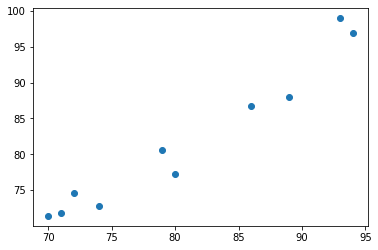

In [38]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='Avg Grades'>

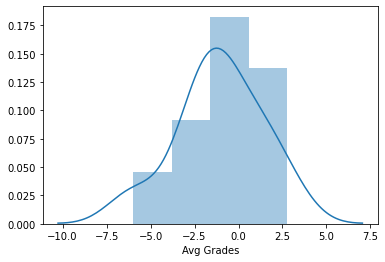

In [39]:
sns.distplot(y_test - predictions)

Now we can use the model to predict avg grade for a given set of features

In [40]:
vals = np.array([100,30,10000,7,3]).reshape(1,-1)
model.predict(vals)

array([73.10705523])

In [41]:
#######################################################
# TRY WITH THE COUNTRY
#

In [42]:
df.head(7)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6
1,agam,6,GR,172,71,92,9200,5,4
2,avi,7,ISR,143,58,82,12000,3,7
3,dani,7,US,160,70,90,15000,4,4
4,dina,7,ISR,110,26,64,10000,6,8
5,efrat,7,EN,115,33,75,8000,5,5
6,ehud,8,ISR,155,66,85,18000,2,7


In [43]:
df.Country.unique()

array(['SP', 'GR', 'ISR', 'US', 'EN', 'FR'], dtype=object)

In [44]:
df = pd.get_dummies(df,columns=['Country'],drop_first=True)

In [45]:
df.head(10)

,Name,Age,Height,Weight,Avg Grades,income,house rooms,family persons,Country_FR,Country_GR,Country_ISR,Country_SP,Country_US
0,adar,6,113,30,70,16700,7,6,0,0,0,1,0
1,agam,6,172,71,92,9200,5,4,0,1,0,0,0
2,avi,7,143,58,82,12000,3,7,0,0,1,0,0
3,dani,7,160,70,90,15000,4,4,0,0,0,0,1
4,dina,7,110,26,64,10000,6,8,0,0,1,0,0
5,efrat,7,115,33,75,8000,5,5,0,0,0,0,0
6,ehud,8,155,66,85,18000,2,7,0,0,1,0,0
7,eli,8,155,61,84,8900,7,10,0,1,0,0,0
8,ester,8,130,48,79,19600,2,4,0,0,1,0,0
9,evyatar,8,110,34,72,7600,3,4,0,0,1,0,0


In [46]:
X = df.drop(['Avg Grades','Name'],axis=1)

In [47]:
y = df['Avg Grades']

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [49]:
model = lin.LinearRegression()

In [50]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7447917305317231

In [51]:
model.score(X_train, y_train)

0.9740260051640607

In [52]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.5837867382368125

In [53]:
pd.DataFrame(model.coef_.reshape(-1,1),X_train.columns,columns=["Coeff"])

,Coeff
Age,0.215108
Height,0.153490
Weight,0.257809
income,-0.000056
house rooms,-0.953916
family persons,-0.294556
Country_FR,3.235693
Country_GR,0.869548
Country_ISR,-3.425386
Country_SP,1.587252


In [54]:
###################
# OLS DEMO
# linear reg - statsmodels.ipynb
# OLS on data with country dummy var

In [55]:
import statsmodels.api as st
import numpy as np
import pandas as pd

In [56]:
X_train2 = st.add_constant(X_train)
# X_train


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
res = st.OLS(y_train, X_train2).fit()

In [58]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Avg Grades   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     27.27
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.93e-05
Time:                        01:05:52   Log-Likelihood:                -31.674
No. Observations:                  20   AIC:                             87.35
Df Residuals:                       8   BIC:                             99.30
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.9684      5.972      8.702      0.000      38.197      65.740
Age                0.2151      0.407      0.528      0.612      -0.724       1.155
Height             0.1535      0.097      1.579      0.153      -0.071       0.378
Weight             0.2578      0.144      1.793      0.111      -0.074       0.589
income         -5.558e-05    6.6e-05     -0.842      0.424      -0.000    9.67e-05
house rooms       -0.9539      0.451     -2.116      0.067      -1.993       0.085
family persons    -0.2946      0.366     -0.805      0.444      -1.138       0.549
Country_FR         3.2357      2.845      1.137      0.288      -3.324       9.796
Country_GR         0.8695      2.315      0.376      0.717      -4.468       6.207
Country_ISR       -3.4254      1.923     -1.781      0.113      -7.860       1.009
Country_SP         1.5873      2.775      0.572      0.583      -4.811       7.986
Country_US         0.0074      2.032      0.004      0.997      -4.677       4.692
==============================================================================
Omnibus:                        3.431   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.545
Skew:                           0.480   Prob(JB):                        0.462
Kurtosis:                       3.965   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
###############################
# TRY THIS OLS with the model without the dummy variables
#

In [60]:
X_train.shape

(20, 11)